In [2]:
import collections
from collections import defaultdict
import sys
import json
import random
from jsmin import jsmin
from io import StringIO
import numpy as np
import copy
import importlib
from functools import partial
import math
import os
import argparse
import random

script_n = 'pc_pfs_pattern_similarity_210707'

sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData

min_length = 20
max_dist = 100
n_random = 20

from weight_database import WeightDatabase
weightdb = WeightDatabase()

weightdb.load_syn_db('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/gen_db/pfs/gen_210101_setup01_syndb_threshold_10_coalesced_filtered_10.gz')
weightdb.load_touch_db(
    '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/purkinje/db_pf_contacts_201224.gz',
    max_dist=max_dist
    )

postsyns = weightdb.get_postsyn_ids()
hist = defaultdict(list)

def calc_pattern_similarity(weightdb, type='Data'):
    mpd = MyPlotData()
    processed = set()
    n = 0
    for pc0 in postsyns:
        for pc1 in postsyns:
            if pc0 == pc1:
                continue
            if (pc0, pc1) in processed:
                continue
            processed.add((pc0, pc1))
            processed.add((pc1, pc0))
            if len(weightdb.get_shared_presyns(pc0, pc1)) < min_length:
                continue
            score = weightdb.calc_pattern_similarity(pc0, pc1)
            # if score >= 0.7:
            #     print(f'{pc0} and {pc1}: {score}')
            mpd.add_data_point(
                score=score,
                type=type,
                )
            n += 1
            hist[type].append(score)
    return mpd

mpd_data = calc_pattern_similarity(weightdb)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
Ttest_indResult(statistic=3.0002396418822963, pvalue=0.002702221406676858)
RanksumsResult(statistic=2.0894433162349513, pvalue=0.036667835451747656)
MannwhitneyuResult(statistic=5071143.0, pvalue=0.01833027196140502)
KstestResult(statistic=0.04145114942528738, pvalue=0.19910670383515738)


NameError: name 'asdf' is not defined

In [ ]:

for i in range(n_random):
    print(i)
    random.seed(i)
    weightdb_random = weightdb.randomize_connectivity(type='postsyn')
    mpd_random = calc_pattern_similarity(weightdb_random, type='Random')


In [6]:
# dump shuffled data
import compress_pickle

fout_name = f'{script_n}_max_dist_{max_dist}_min_length_{min_length}_n_{n_random}_hist_random.gz'
compress_pickle.dump(hist['Random'], fout_name)

fout_name = f'{script_n}_max_dist_{max_dist}_min_length_{min_length}_hist_data.gz'
compress_pickle.dump(hist['Data'], fout_name)

In [3]:


import scipy
fout_name = f'{script_n}_max_dist_{max_dist}_min_length_{min_length}_n_{n_random}'
with open(f'{script_n}_results', 'w') as fout:
    for foutt in [fout, sys.stdout]:
        print(scipy.stats.ttest_ind(hist['Data'], hist['Random']), file=foutt)
        print(scipy.stats.ranksums(hist['Data'], hist['Random']), file=foutt)
        print(scipy.stats.mannwhitneyu(hist['Data'], hist['Random'], alternative='greater'), file=foutt)
        print(scipy.stats.ks_2samp(hist['Data'], hist['Random']), file=foutt)


Ttest_indResult(statistic=3.0002396418822963, pvalue=0.002702221406676858)
RanksumsResult(statistic=2.0894433162349513, pvalue=0.036667835451747656)
MannwhitneyuResult(statistic=5071143.0, pvalue=0.01833027196140502)
KstestResult(statistic=0.04145114942528738, pvalue=0.19910670383515738)


Height: 4, Aspect: 1.0


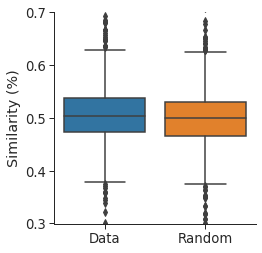

Height: 4, Aspect: 1.33


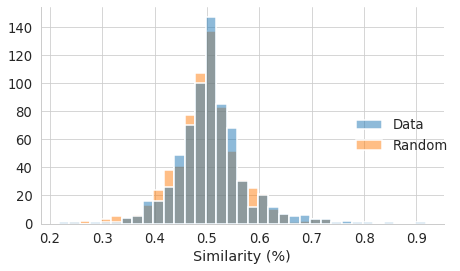

In [4]:

mpd_all = MyPlotData()
mpd_all.append(mpd_data)
mpd_all.append(mpd_random)

importlib.reload(my_plot); my_plot.my_catplot(
    mpd_all,
    x="type",
    y="score",
    # hue="type",
    # hue_order=['All', 'Per PC', 'Per pf'],
    # hue_order=['All', 'Per PC'],
    ylim=[.30, .70],
    context='paper',
    kind='box',
    # add_swarm=True,
    # font_scale=1.5,
    height=4,
    width=4,
    y_axis_label='Similarity (%)',
    # x_axis_label='# of synapses per connection',
    save_filename=f'{script_n}_max_dist_{max_dist}_min_length_{min_length}.svg',
    show=True,
    )


importlib.reload(my_plot); my_plot.my_displot(
    mpd_all,
    # x="num_syns_per_connection",
    x="score",
    hue="type",
    # hue_order=['All', 'Per PC', 'Per pf'],
    # hue_order=['All', 'Per PC'],
    # ylim=[.30, .70],
    context='paper',
    kind='hist',
    # add_swarm=True,
    # font_scale=1.5,
    height=4,
    binwidth=.02,
    # width=2.5,
    # y_axis_label='Similarity (%)',
    x_axis_label='Similarity (%)',
    save_filename=f'{script_n}_max_dist_{max_dist}_min_length_{min_length}_dist.svg',
    show=True,
    )
